In [170]:
import pandas as pd

data = pd.read_csv("Predict Price/simple_kaggle_dataset.csv")
data.head()

,Product_ID,Category,Price,Quantity_Sold,Rating
0,1,Grocery,661,17,2.0
1,2,Furniture,4797,38,4.9
2,3,Electronics,2481,24,2.6
3,4,Grocery,1495,5,4.6
4,5,Grocery,3842,34,3.5


In [175]:
y_full = data.Price
X_full = data.drop(['Price'],axis=1)
X_full.head()
y_full.head()

0     661
1    4797
2    2481
3    1495
4    3842
Name: Price, dtype: int64

In [201]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X_full,y_full,train_size=0.8,test_size=0.2,random_state=0)

In [223]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
OH_cat_train = pd.DataFrame(OH_encoder.fit_transform(X_train[['Category']]),index=X_train.index,columns=OH_encoder.get_feature_names_out(['Category']))
OH_cat_valid = pd.DataFrame(OH_encoder.transform(X_valid[['Category']]),index=X_valid.index,columns=OH_encoder.get_feature_names_out(['Category']))
OH_cat_train.head()
OH_cat_valid.head()

,Category_Clothing,Category_Electronics,Category_Furniture,Category_Grocery
26,1.0,0.0,0.0,0.0
86,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
55,0.0,0.0,1.0,0.0
75,1.0,0.0,0.0,0.0


In [229]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
quantity_norm_train = pd.DataFrame(scaler.fit_transform(X_train[['Quantity_Sold']]),index=X_train.index,columns=['Quantity_Sold'])
quantity_norm_valid = pd.DataFrame(scaler.transform(X_valid[['Quantity_Sold']]),index=X_valid.index,columns=['Quantity_Sold'])
quantity_norm_train.head()
quantity_norm_valid.head()

,Quantity_Sold
26,0.666667
86,0.666667
2,0.479167
55,0.375000
75,0.583333


In [232]:
new_X_train = pd.concat([X_train.copy().drop(['Product_ID','Category','Quantity_Sold'],axis=1),quantity_norm_train,OH_cat_train],axis=1)
new_X_valid = pd.concat([X_valid.copy().drop(['Product_ID','Category','Quantity_Sold'],axis=1),quantity_norm_valid,OH_cat_valid],axis=1)
new_X_train.head()

,Rating,Quantity_Sold,Category_Clothing,Category_Electronics,Category_Furniture,Category_Grocery
43,2.4,0.979167,0.0,0.0,1.0,0.0
62,3.2,0.479167,0.0,1.0,0.0,0.0
3,4.6,0.083333,0.0,0.0,0.0,1.0
71,4.1,0.979167,1.0,0.0,0.0,0.0
45,4.2,0.020833,0.0,0.0,1.0,0.0


In [246]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(new_X_train,y_train)

LinearRegression()

In [247]:
prediction = model.predict(new_X_valid)
print(prediction)

[2239.27418258 2135.40981532 2855.6093941  3500.98348386 2171.41925938
 2496.36196717 3507.12800973 2303.49541796 2533.54656896 2299.86173015
 3186.08412832 2460.35252311 2662.78445541 2693.77222335 3061.35756768
 2728.88234571 2592.16354313 3617.66717999 2364.3481041  2284.52157568]


In [248]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(prediction,y_valid)
print(mae)

1219.3669307451453


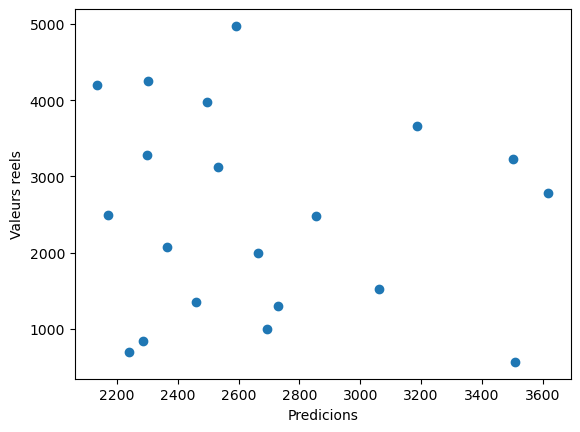

In [249]:
import matplotlib.pyplot as plt
plt.scatter(prediction,y_valid)
plt.xlabel('Predicions')
plt.ylabel('Valeurs reels')
plt.show()